In [98]:
import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap
%matplotlib inline

In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [3]:
sim_genes_f = "/Users/pfreese/Downloads/sim_DE_genes.tsv"

In [9]:
# Load the table with a header row, and set the index_col
genes_df = pd.read_csv(sim_genes_f, sep='\t', header = 0, index_col = 0)

In [14]:
genes_df.head()

,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,...,n991,n992,n993,n994,n995,n996,n997,n998,n999,n1000
sample,,,,,,,,,,,,,,,,,,,,,
ref_samp_0,4.2722,9.0641,1.0033,2.1779,6.5201,1.1924,8.2963,5.4176,3.2438,6.2344,...,6.0767,9.0379,2.6671,0.5288,0.1436,10.0031,2.0119,5.6913,3.8079,1.9150
ref_samp_1,4.5031,9.2417,1.6519,2.2867,14.8587,0.9970,4.3195,4.7348,3.1930,6.5898,...,5.1855,8.0424,2.4842,0.6801,0.1652,9.9749,2.6513,5.2720,3.8037,1.5226
ref_samp_2,3.4212,6.8712,1.6541,1.9125,10.3443,1.3667,7.5857,6.6810,4.2347,9.8281,...,6.2918,8.2399,3.0770,0.7235,0.1631,10.5248,4.4565,5.7343,2.6152,1.8011
ref_samp_3,4.5443,8.1563,1.5727,1.5599,13.7435,1.2203,4.3833,6.6623,2.6808,10.1065,...,5.7169,5.9457,1.8148,0.6039,0.2015,9.4529,3.9126,7.0842,3.4693,1.8698
ref_samp_4,2.5865,8.2803,1.0101,2.1440,9.7851,1.3984,3.8896,3.6343,3.4970,6.3656,...,4.2027,8.1397,2.7161,0.5834,0.1533,10.2936,3.9827,5.3672,3.2267,1.8499


In [19]:
# Print out the shape, containing (no. of samples) vs. (no of genes)
genes_df.shape

(200, 1200)

In [24]:
genes_df.index

Index(['ref_samp_0', 'ref_samp_1', 'ref_samp_2', 'ref_samp_3', 'ref_samp_4',
       'ref_samp_5', 'ref_samp_6', 'ref_samp_7', 'ref_samp_8', 'ref_samp_9',
       ...
       'changed_samp_90', 'changed_samp_91', 'changed_samp_92',
       'changed_samp_93', 'changed_samp_94', 'changed_samp_95',
       'changed_samp_96', 'changed_samp_97', 'changed_samp_98',
       'changed_samp_99'],
      dtype='object', name='sample', length=200)

In [26]:
def get_ref_or_changed(id):
    ref_or_changed = id.split("_")[0]
    assert(ref_or_changed in ['ref', 'changed'])
    return ref_or_changed

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199])

In [33]:
sample_categories = list(map(get_ref_or_changed, genes_df.index))

In [35]:
# Make a map of sample category -> index (ref = 0, changed = 1)
cat_to_idx = {"ref": 0, "changed": 1}

In [114]:
# Convert each sample row to 0 ("ref") or 1 ("changed") for training/evaluation
ys = pd.Series([cat_to_idx[get_ref_or_changed(samp_id)] for samp_id in genes_df.index])
ys[1:5]

1    0
2    0
3    0
4    0
dtype: int64

In [17]:
# Instantiate a UMAP object
reducer = umap.UMAP()

In [18]:
# Train the reducer
embedding = reducer.fit_transform(genes_df)
embedding.shape

/Users/pfreese/dl/venv/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


(200, 2)

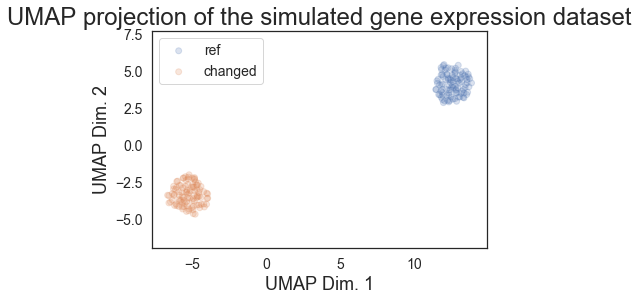

In [79]:
cat_handles = []
cat_labels = []
for cat, _ in cat_to_idx.items():
    sample_rows = np.where(genes_df.index.str.contains(cat))[0]
    hand = plt.scatter(embedding[sample_rows, 0],
                embedding[sample_rows, 1],
                c = [sns.color_palette()[cat_to_idx[cat]] for _ in sample_rows],
                alpha = 0.2)
    # Add this handle & its lable
    cat_handles.append(hand)
    cat_labels.append(cat)
    
plt.gca().set_aspect('equal', 'datalim')
plt.gca().legend(cat_handles, cat_labels, fontsize = 14)
plt.xlabel("UMAP Dim. 1", fontsize = 18)
plt.ylabel("UMAP Dim. 2", fontsize = 18)
plt.title('UMAP projection of the simulated gene expression dataset', fontsize = 24)
plt.tick_params(axis='both', which='major', labelsize=14)

In [94]:
kf = KFold(n_splits = 10, shuffle = True)
kf.get_n_splits(genes_df)

10

In [99]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [129]:
# For each of the 10 folds
for train_index, test_index in kf.split(genes_df):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = genes_df.iloc[train_index], genes_df.iloc[test_index]
    y_train, y_test = ys.iloc[train_index], ys.iloc[test_index]
    
    clf.fit(X_train, y_train)
    # Get the test prediction probabilities and categories.
    # Probabilities are like:
    #   array([[9.99850746e-01, 1.49253731e-04],
    #          [9.20000000e-01, 8.00000000e-02],
    # preds are like:
    #     array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1
    # score is a float from 0 to 1.
    pred_probs = clf.predict_proba(X_test)
    preds = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    
    # My own additional scoring metrics
    num_incorrect = sum(abs(preds - y_test))
    incorrect_preds = preds != y_test
    break

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  50  51  52  53  54  55
  57  58  59  60  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 124 126 128 129 130 131 132 134 135
 136 137 139 142 143 145 146 147 149 150 151 152 153 154 155 157 158 159
 160 161 162 164 165 166 167 168 169 170 171 172 174 175 176 177 178 179
 180 181 182 183 184 185 187 188 189 191 192 193 194 195 196 197 198 199] TEST: [ 27  49  56  61  90  91 123 125 127 133 138 140 141 144 148 156 163 173
 186 190]


In [128]:
preds != y_test

18     False
45     False
56     False
64     False
69     False
71     False
80     False
86     False
100    False
106    False
109    False
119    False
137    False
138    False
139    False
161    False
166    False
172    False
181    False
197    False
dtype: bool